<시작하세요! 텐서플로 2.0 프로그래밍> 예제코드입니다.

- 예제 코드를 실행하기 위해서는 [파일] > [드라이브에 사본 저장]으로 본인의 계정에 사본을 만든 다음 실행하면 됩니다.
- 예제 코드는 [깃허브 저장소](https://github.com/wikibook/tf2)에서도 동일하게 제공됩니다. 예제에 대한 질문이나 책에 대한 질문은 깃허브 저장소의 [Issues](https://github.com/wikibook/tf2/issues)에 올려주세요.
- 각 장의 예제 파일은 처음부터 끝까지 실행하는 상황을 가정하고 작성되었습니다. 혹시 세션이 다운되는 등의 이유로 실행이 되지 않는 경우가 있다면, 필요한 라이브러리를 import 하신 후에 실행하시면 됩니다. (tensorflow, numpy, pandas 등)

# 3.1 Hello World

In [114]:
# 3.1 Hello World 프로그램
print("Hello, World!")

Hello, World!


In [115]:
# 3.2 Hello World 프로그램 첫 줄의 # 를 지웠을 때 에러가 나는 모습
#3.1 Hello World
print("Hello, World!")

Hello, World!


In [116]:
# 3.3 Hello World 프로그램 문자열의 따옴표(“)를 홑따옴표(‘)로 바꿈
print('Hello, World!')

Hello, World!


# 3.2 Hello 텐서플로 2.0

In [117]:
# 3.4 텐서플로 2.0 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

In [118]:
# Google Colab 운영체제 확인
import platform
print(platform.platform())

Windows-10-10.0.19045-SP0


In [119]:
# 3.5 텐서플로우 불러오기, 버전 확인
import tensorflow as tf
print(tf.__version__)

2.12.0


In [120]:
# 3.6 텐서플로우 불러오기, 버전 확인 에러
import tensorflow as tf
print(tf.__version__)

2.12.0


# 3.3 텐서플로 기초

## 3.3.1 랜덤한 수 생성

In [121]:
# 3.7 랜덤한 수 얻기 (균일 분포)
rand = tf.random.uniform([1],0,1)
print(rand)

tf.Tensor([0.05830479], shape=(1,), dtype=float32)


In [122]:
# 3.8 랜덤한 수 여러 개 얻기 (균일 분포)
rand = tf.random.uniform([4],0,1)
print(rand)

tf.Tensor([0.40097463 0.15521479 0.68837047 0.40262938], shape=(4,), dtype=float32)


In [123]:
# 3.9 랜덤한 수 여러 개 얻기 (정규 분포)
rand = tf.random.normal([4],0,1)
print(rand)

tf.Tensor([-0.35273704  0.40930057 -1.2637484   0.46423522], shape=(4,), dtype=float32)


## 3.3.2 뉴런 만들기

In [124]:
# 3.10 sigmoid 함수
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [125]:
# 3.11 뉴런의 입력과 출력 정의
x = 1 # 입력
y = 0 # 출력
w = tf.random.normal([1],0,1)
output = sigmoid(x * w) # sigmoid 계산신 = 뉴런 / output : 기댓값, 예측값
print(output)

0.48231428266730103


In [126]:
# 3.12 경사 하강법을 이용한 뉴런의 학습
# for loop를 돌면서 error가 최소가 되는 지점을 찾아가는 것. 
for i in range(1000):
    output = sigmoid(x * w)
    error = y - output # error : 잔차를 의미
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 -0.10067403934967854 0.10067403934967854
199 -0.05194348699297409 0.05194348699297409
299 -0.03466275362593335 0.03466275362593335
399 -0.025930479515752686 0.025930479515752686
499 -0.02068485557600125 0.02068485557600125
599 -0.017192372900769973 0.017192372900769973
699 -0.01470284632287192 0.01470284632287192
799 -0.01283971338852373 0.01283971338852373
899 -0.011393627330729364 0.011393627330729364
999 -0.010239014929302199 0.010239014929302199


In [127]:
# 3.13 x=0 일 때 y=1 을 얻는 뉴런의 학습
x = 0
y = 1
w = tf.random.normal([1],0,1)

for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 0.5 0.5
199 0.5 0.5
299 0.5 0.5
399 0.5 0.5
499 0.5 0.5
599 0.5 0.5


699 0.5 0.5
799 0.5 0.5
899 0.5 0.5
999 0.5 0.5


In [128]:
# 3.14 x=0 일 때 y=1 을 얻는 뉴런의 학습에 편향을 더함
x = 0
y = 1
w = tf.random.normal([1],0,1) # 가중치 (난수)
b = tf.random.normal([1],0,1) # 편향 (난수)

for i in range(1000):
    output = sigmoid(x * w + 1 * b)
    error = y - output
    w = w + x * 0.1 * error
    b = b + 1 * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output) # error는 0으로 수렴하고, output은 1로 수렴함

99 0.1119902463191742 0.8880097536808258
199 0.05497168834219179 0.9450283116578082
299 0.0360107237806192 0.9639892762193808
399 0.026684334988532177 0.9733156650114678
499 0.02116431422542875 0.9788356857745713
599 0.01752348330513076 0.9824765166948692
699 0.014944916420223109 0.9850550835797769
799 0.01302428377584619 0.9869757162241538
899 0.01153890778096367 0.9884610922190363
999 0.010356313319453747 0.9896436866805463


## 3.3.3 첫번째 신경망 네트워크 : AND

In [129]:
# 3.15 True, False 의 정수값 확인
print(int(True))
print(int(False))

1
0


In [130]:
# 3.16 첫번째 신경망 네트워크 : AND
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]]) # 입력
y = np.array([[1], [0], [0], [0]]) # 출력
w = tf.random.normal([2],0,1) # 가중치 난수 생성(최초 1회)
b = tf.random.normal([1],0,1) # 편향 난수 생성(최초 1회)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4): # range(4) : x(x1, x2)의 입력이 총 4가지라서(AND입력)
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output # 차이 계산-> error이 양.음수가 나오기에 증감이 계속 되면서 결과적으로 0으로 수렴
        w = w + x[j] * 0.1 * error # 가중치 업데이트 : 가중치를 더했지만 결과적으로 error은 감소하는 경향이 있음 
        b = b + b_x * 0.1 * error # 편향 업데이트
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum) # error_sum은 0으로 수렴

199 -0.09916433275206608
399 -0.06159385238977669
599 -0.04453509155071944
799 -0.03478275093199514
999 -0.02848485870102864
1199 -0.02409236185054227
1399 -0.020858783858660513
1599 -0.018381247086152432
1799 -0.016424909261810713
1999 -0.014840068232287887


In [131]:
# 3.17 파이썬에서 리스트에 정수를 곱하기
print([1,2,3]*2)
print([1,2,3]*0)
print([1,2,3]*-1)

[1, 2, 3, 1, 2, 3]
[]
[]


In [132]:
# 3.18 파이썬에서 리스트에 실수를 곱하기
print([1,2,3]*0.01)



TypeError: can't multiply sequence by non-int of type 'float'

In [134]:
# 3.19 넘파이 array 에 정수, 실수를 곱하기
import numpy as np
print(np.array([1,2,3])*2)
print(np.array([1,2,3])*0)
print(np.array([1,2,3])*-1)
print(np.array([1,2,3])*0.01)

[2 4 6]
[0 0 0]
[-1 -2 -3]
[0.01 0.02 0.03]


In [135]:
# 3.20 AND 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.965356898258599
X: [1 0] Y: [0] Output: 0.02455269426126834
X: [0 1] Y: [0] Output: 0.02462680586405554
X: [0 0] Y: [0] Output: 2.280612884633225e-05


## 3.3.4 두번째 신경망 네트워크 : OR

In [136]:
# 3.21 두번째 신경망 네트워크 : OR
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [1], [1], [0]])
w = tf.random.normal([2],0,1) # [평균, 분산] 이차원 배열
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b) # x하고 가중치 곱해 바이어스 더하기
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error # 0.1 : 학습률
        b = b + b_x * 0.1 * error # error값을 가지고 업데이트 
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.042806092921605976
399 -0.02389115882179113
599 -0.016463699508110996
799 -0.012519457081467088
999 -0.010082975995787252
1199 -0.008432279393932547
1399 -0.007241782719314048
1599 -0.00634295579610239
1799 -0.005641646082921843
1999 -0.005077657203867124


In [137]:
# 3.22 OR 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b)) # x : 입력 /  y : 출력 / output : 결과

X: [1 1] Y: [1] Output: 0.9999973217038011
X: [1 0] Y: [1] Output: 0.9899267406779884
X: [0 1] Y: [1] Output: 0.9899126087644273
X: [0 0] Y: [0] Output: 0.025178870960380743


## 3.3.5 세번째 신경망 네트워크 : XOR

In [138]:
# 3.23 세번째 신경망 네트워크 : XOR
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.0035421443002990882
399 -0.00014401333547064965
599 -5.851370740828088e-06
799 -2.587375196316799e-07
999 4.653552765354618e-09
1199 3.722842145670313e-09
1399 3.722842145670313e-09
1599 3.722842145670313e-09
1799 3.722842145670313e-09
1999 3.722842145670313e-09


In [139]:
# 3.24 XOR 네트워크의 평가 -> 첫번쨰 AI 겨울(0인지 1인지 판단 불가)
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [0] Output: 0.5128176286712095
X: [1 0] Y: [1] Output: 0.5128176305326305
X: [0 1] Y: [1] Output: 0.4999999990686774
X: [0 0] Y: [0] Output: 0.5000000009313226


In [140]:
# 3.25 XOR 네트워크의 w, b 값 확인
print('w(가중치):', w) # 5.1281769e-02으로만 결정이 된다.(나머지값은 거의 0에 수렴해서 무시)
print('b(편향):', b)

w(가중치): tf.Tensor([ 5.1281754e-02 -7.4505806e-09], shape=(2,), dtype=float32)
b(편향): tf.Tensor([3.7252903e-09], shape=(1,), dtype=float32)


In [141]:
# 3.26 AND 네트워크의 w, b 값 확인 -> AND일때는 가중치 값을 확실히 판단가능함
# w: tf.Tensor([6.9484286 6.951607 ], shape=(2,), dtype=float32)
# b: tf.Tensor([-10.601849], shape=(1,), dtype=float32)

In [142]:
# 3.27 tf.keras 를 이용한 XOR 네트워크 계산
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([ # Sequential
    # Dense 레이어 쌓기
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)), # input_shape : 입력 단자 2개
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse') # SGD : 확률적경사하강법 / lr : 학습률

model.summary() # 모델의 결과(구성) 출력

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2)                 6         
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [143]:
# 3.28 tf.keras 를 이용한 XOR 네트워크 학습
history = model.fit(x, y, epochs=2000, batch_size=1) #fit : 학습 / x,y에 대해 2000번 반복을 하는데 batch사이즈를 한개로 결정

Epoch 1/2000


4/4 [==============================] - 0s 1ms/step - loss: 0.2608
Epoch 2/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2603
Epoch 3/2000
4/4 [==============================] - 0s 997us/step - loss: 0.2597
Epoch 4/2000
4/4 [==============================] - 0s 991us/step - loss: 0.2592
Epoch 5/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2588
Epoch 6/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2584
Epoch 7/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2581
Epoch 8/2000
4/4 [==============================] - 0s 997us/step - loss: 0.2578
Epoch 9/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2575
Epoch 10/2000
4/4 [==============================] - 0s 665us/step - loss: 0.2572
Epoch 11/2000
4/4 [==============================] - 0s 997us/step - loss: 0.2570
Epoch 12/2000
4/4 [==============================] - 0s 842us/step - loss: 0.2569
Epoch 13/2000
4/4 [==============================]

In [144]:
# 3.29 tf.keras 를 이용한 XOR 네트워크 평가
model.predict(x) # 네트워크 출력 결과

1/1 [==============================] - 0s 35ms/step


array([[0.3819776 ],
       [0.7487314 ],
       [0.36487427],
       [0.38370997]], dtype=float32)

In [145]:
# 3.30 XOR 네트워크의 가중치와 편향 확인
for weight in model.weights:
    print(weight)

<tf.Variable 'dense_10/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-3.2643034 ,  0.63513464],
       [ 3.7463164 , -1.1790236 ]], dtype=float32)>
<tf.Variable 'dense_10/bias:0' shape=(2,) dtype=float32, numpy=array([ 2.2880008 , -0.19930334], dtype=float32)>
<tf.Variable 'dense_11/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-2.6224132],
       [-0.6218388]], dtype=float32)>
<tf.Variable 'dense_11/bias:0' shape=(1,) dtype=float32, numpy=array([2.1870394], dtype=float32)>


# 3.4 시각화 기초

## 3.4.1	matplotlib.pyplot 을 사용한 그래프 그리기

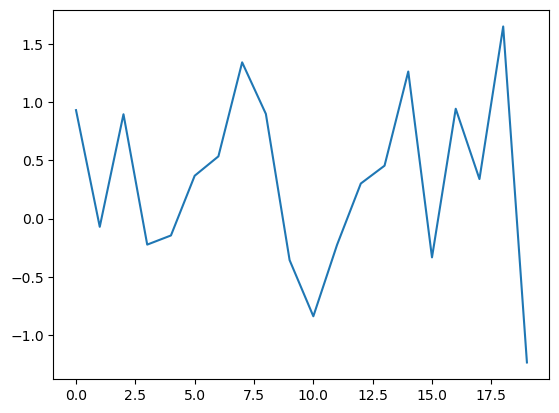

In [146]:
# 3.31 간단한 꺾은선 그래프 그리기
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y)
plt.show()

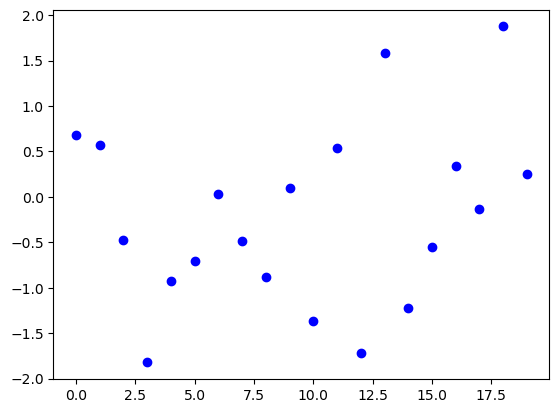

In [150]:
# 3.32 간단한 점 그래프 그리기
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y,'bo')
plt.show()

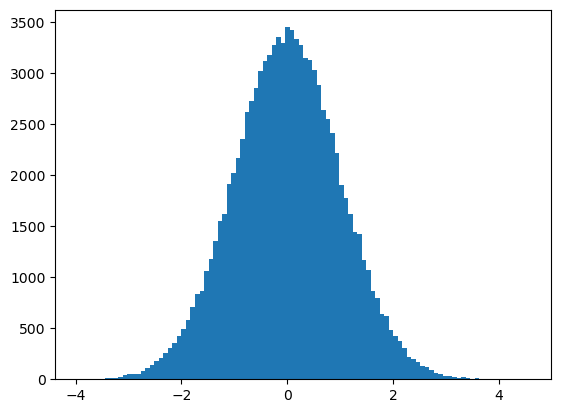

In [151]:
# 3.33 정규분포 그래프를 히스토그램으로 나타내기
import matplotlib.pyplot as plt
random_normal = tf.random.normal([100000],0,1)
plt.hist(random_normal, bins=100)
plt.show()

## 3.4.2 2-레이어 XOR 네트워크의 정보 시각화

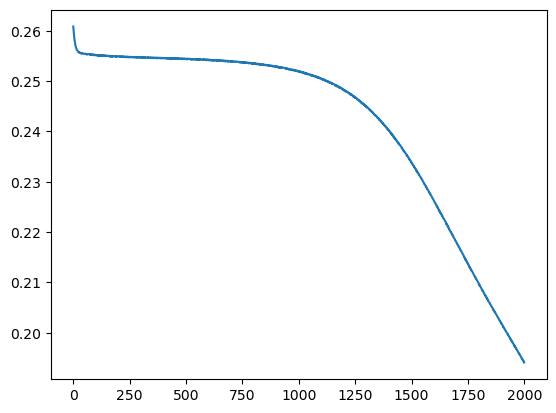

In [152]:
# 3.34 2-레이어 XOR 네트워크의 loss 변화를 선 그래프로 표시
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])